
# Project : Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The movie dataset provides a wealth of information on various aspects of films. It includes details such as genres, production costs, and critic reviews. By analyzing this data, we can gain insights into the movie industry. We will focus on key factors that influence movie success. We will investigate how production budgets, genre popularity, and box office earnings are linked.
>
>the questions I plan to explore include:
 > - <a href="#q1">Are there any relationships between the runtime of a movie and the vote count?</a></li>
> - <a href="#q2">What is the Count of released movies per year?</a></li>
> -  <a href="#q3">What is the movies distributed across different release years?</a></li>
>
>
>By analyzing one dependent variable and three independent variables, I hope to uncover interesting patterns and relationships within the data.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here , i am going to load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Dropping Unnecessary Columns.

In [3]:
df.drop(['id', 'imdb_id', 'cast', 'homepage' , 'tagline' , 'director' ,  'production_companies'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.shape

(10866, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   keywords        9373 non-null   object 
 5   overview        10862 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB



### Checking For Missing Data (NaN) and Data Cleaning 

In [7]:
df.isnull().sum()

popularity           0
budget               0
revenue              0
original_title       0
keywords          1493
overview             4
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

#### Here, we find that the "keywords" and "genres" columns have missing values, and they are all categorical data.







In [8]:
df.fillna(df.mode, inplace=True)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
keywords          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

 #### Here , We Replaced The Missing Data With the Mode.

### Here We dropped Duplicates

In [9]:
df.drop_duplicates()

,popularity,budget,revenue,original_title,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


#### Now , The Data Shoulde Be Clean , Let's Check it by code.

In [10]:
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
keywords          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

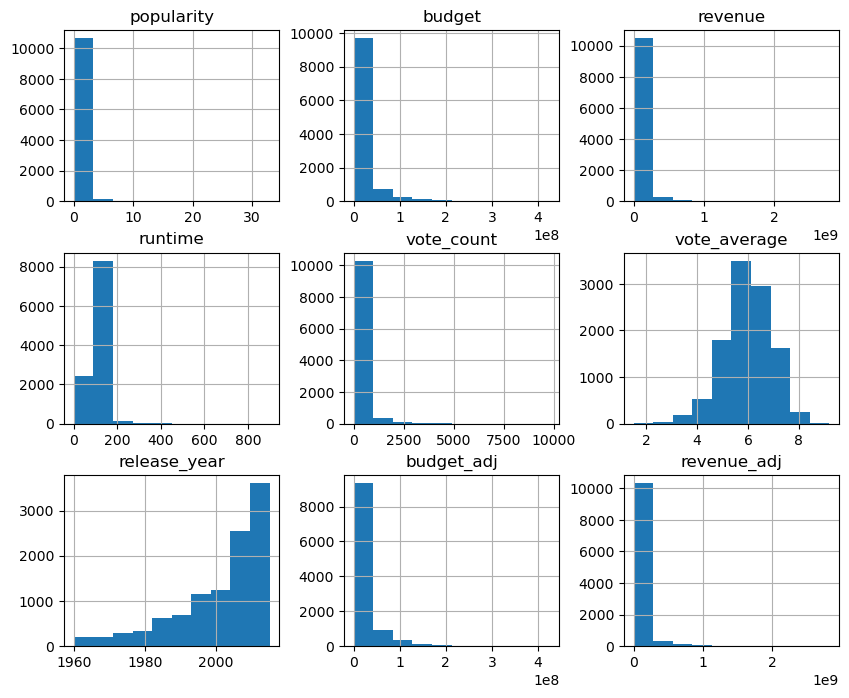

In [11]:
df.hist(figsize=(10,8));

> #### In the popularity, budget, revenue, runtime, vote count, and revenue_adj columns, highly skewed to the right.
> #### The vote_average follows a normal (symmetric) distribution.
> #### The release_year column is left-skewed.

#### So The Data Is Clean and Ready To Explore It.

<a id='eda'></a>

## Exploratory Data Analysis

<a id='q1'></a>

###  1.Are there any relationships between the runtime of a movie and the vote count?

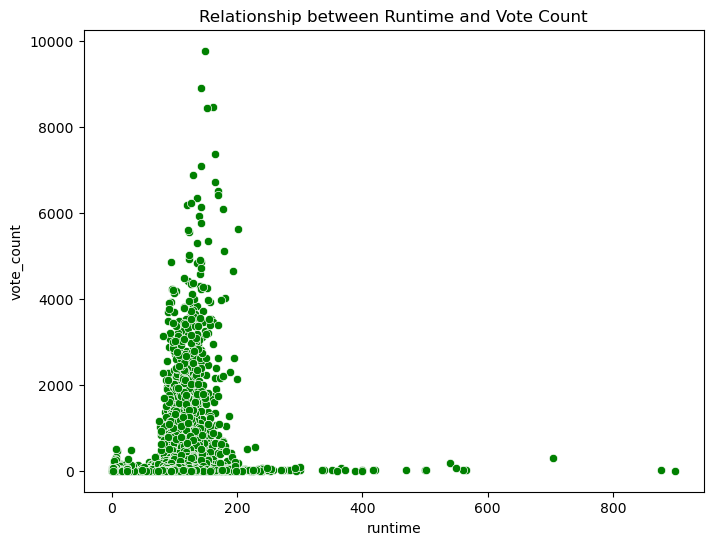

In [12]:
# I will create a function so I can use it in any plot I want.

def scatterplot(df, x, y, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, data=df, color='green')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()
    
scatterplot(df, 'runtime', 'vote_count', 'Relationship between Runtime and Vote Count')

In [20]:
scatterplot(df, 'popularity', 'budget', 'qahba sharmoota)

SyntaxError: unterminated string literal (detected at line 1) (2515627133.py, line 1)

> ### There is a negative correlation between the Runtime and Vote count, which means that as the runtime increases, the vote count tends to decrease.

<a id='q2'></a>

### 2.What is the Count of released movies per year?

In [13]:
movie_count_by_year = df['release_year'].value_counts()

movie_count_by_year = movie_count_by_year.sort_index(ascending=False) 

In [14]:
# Group data by release year
year_grouped_data = df.groupby('release_year')

# Count movies in each group (year)
movie_count_by_year = year_grouped_data.size()
movie_count_by_year

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
dtype: int64

In [15]:
movie_count_by_year.mean()

194.03571428571428

In [16]:
movie_count_by_year.min()

31

In [17]:
movie_count_by_year.max()

700

> ### The average number of movies released per year from 1960 to 2015 is 194 Movie. The minimum release count is 31, and the maximum is 700.

<a id='q3'></a>
### What is the movies distributed across different release years?

In [18]:
# Analyze movie distribution by year (assuming 'release_year' has actual year values)
year_counts = df['release_year'].value_counts()

# Print results (number of movies released each year)
print("Number of Movies Released Each Year:")
print(year_counts)

Number of Movies Released Each Year:
release_year
2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1977     57
1979     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: count, dtype: int64


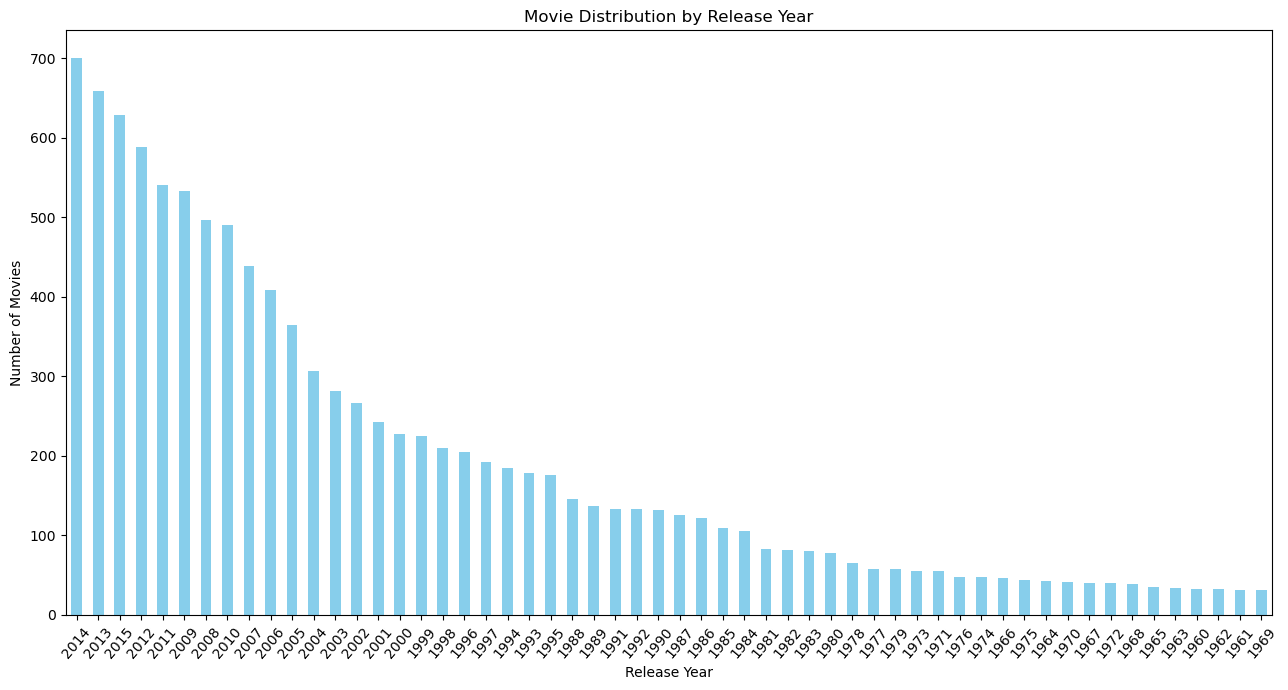

In [19]:
# visualize the results
plt.figure(figsize=(13, 7))
year_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Movie Distribution by Release Year')
plt.xticks(rotation=50)  # Rotate x-axis labels for better readability
plt.tight_layout()

#### We can see here that every year, the number of movie releases is increasing, which gives us a right-skewed distribution across all the years.

<a id='conclusions'></a>
## Conclusion

>  Firstly, the 'keywords' and 'genres' columns have missing values, all of which are categorical data. We filled the NaN values with the mode. From the histogram we created for the entire dataset, it's evident that the columns for popularity, budget, revenue, runtime, vote count, and revenue_adj are highly skewed to the right. On the other hand, the 'vote_average' column follows a normal (symmetric) distribution, while the 'release_year' column is left-skewed.
>
>  Furthermore, there is a negative correlation between runtime and vote count, indicating that as the runtime increases, the vote count tends to decrease. The average number of movies released per year from 1960 to 2015 is 194 movie per year. The minimum release count is 31, and the maximum is 700.
>
>  Lastly, in the last chart, we observe that the number of movie releases is increasing, leading to a right-skewed distribution across all the years.